참조

https://velog.io/@hyesoup/KNNK-Nearest-Neighbor-%EB%B6%84%EB%A5%98-%EC%98%88%EC%A0%9C

https://velog.io/@oooops/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EB%A5%98%ED%95%B4%EB%B3%B4%EA%B8%B0

In [174]:
from sklearn.neighbors import KNeighborsClassifier #사이킷런 KNN 분류 라이브러리

우선 임의로 훈련 데이터와 임의의 라벨링을 통해서 KNN의 학습 방식을 파악하려고 한다

In [175]:
classifier = KNeighborsClassifier(n_neighbors= 1) #3개의 클러스터를 설정한 KNN

training_points = [ #훈련데이터 X
    [0.1, 0.0, 0.2],
    [0.9, 0.9, 0.9],
    [0.9, 0.9, 0.9]
]

training_labels = [0,1,1] #훈련데이터 Y

classifier.fit(training_points, training_labels) #배열이 0에 가까우면 0으로 1에 가까우면 1로 분류하게 훈련 진행



unknown_points = [ #예측데이터 X
    [0.9, 0.5, 0.1],
    [0.4, 0.7, 0.6],
    [0.1, 0.1, 0.1]
]

guesses = classifier.predict(unknown_points) #예측데이터를 이용한 예측

print(guesses) #예측 결과(훈련한 방식대로 분류되는 것을 알 수 있다)

[1 1 0]


유방암 데이터를 이용해 KNN(K-최근접이웃) 알고리즘을 파악해보자

In [176]:
from sklearn.datasets import load_breast_cancer # 사이킷런 유방암 데이터
import pandas as pd #데이터 처리 및 분석 라이브러리

In [177]:
data = load_breast_cancer() #load_breast_cancer()의 유방암 데이터를 data 변수에 넣었다
print(data.DESCR) #DESCR은 데이터셋의 정보를 확인하는 함수다

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [178]:
df_data = pd.DataFrame(data.data) #유방암 데이터의 모든 데이터 나열이다. 데이터 칼럼의 숫자 의미는 DESCR을 통해서 파악할 수 있다
df_labels = pd.DataFrame(data.target) # data.target을 데이터 프레임 형태로 변환하는 것이다
pd.DataFrame(data=data.data, columns=data.feature_names) #위의 data와 칼럼을 보기 쉽게 파악한 바꾼 것이다 내용 상 달라진 것은 없다

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [179]:
print(data.target) #[0,1.....0,1] 과 같은 출력을 가진다
print(data.target_names) #target_names에 malignant는 양상 benign은 음성이다

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [180]:
from sklearn.model_selection import train_test_split # 사이킷런의 모델 학습, 테스트 데이터 분류 함수다

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state= 7) # 트레인 데이터 X, 라벨 데이터 Y, TEST_SIZE 분류 크기, 랜덤스테이트는 값 섞기( 숫자는 큰 의미는 없다. 매번 같은 결과가 나올 수 있도록 '7'이란 이름의 섞기를 진행한다고 보면 된다)


In [181]:
classifier = KNeighborsClassifier(n_neighbors= 3, weights='uniform', algorithm='auto', 
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None) #클러스터 갯수 설정
classifier.fit(x_train, y_train) # 훈련 진행

KNeighborsClassifier(n_neighbors=3)

KNN 파라미터에 대한 설명

▶ n_neighbors : int

이웃의 수인 K를 결정한다. default는 5다. 

▶ weights : {'uniform', 'distance'} or callable

예측에 사용되는 가중 방법을 결정한다. default는 uniform이다. 

'uniform' : 각각의 이웃이 모두 동일한 가중치를 갖는다. 
'distance' : 거리가 가까울수록 더 높은 가중치를 가져 더 큰 영향을 미치게 된다.
'callable' : 사용자가 직접 정의한 함수를 사용할 수도 있다. 거리가 저장된 배열을 입력으로 받고 가중치가 저장된 배열을 반환하는 함수가 되어야 한다. 

▶ algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'} 

가장 가까운 이웃들을 계산하는 데 사용하는 알고리즘을 결정한다. default는 auto이다. 

'auto' : 입력된 훈련 데이터에 기반하여 가장 적절한 알고리즘을 사용한다. 
'ball_tree' : Ball-Tree 구조를 사용한다. (Ball-Tree 설명 : https://nobilitycat.tistory.com/entry/ball-tree)
'kd_tree' : KD-Tree 구조를 사용한다.
'brute' : Brute-Force 탐색을 사용한다. 

▶ leaf_size : int

Ball-Tree나 KD-Tree의 leaf size를 결정한다. default값은 30이다.

이는 트리를 저장하기 위한 메모리뿐만 아니라, 트리의 구성과 쿼리 처리의 속도에도 영향을 미친다. 
 
▶ p : int

민코프스키 미터법(Minkowski)의 차수를 결정한다. 예를 들어 p = 1이면 맨해튼 거리(Manhatten distance), p = 2이면 유클리드 거리(Euclidean distance)이다. 

In [182]:
classifier.score(x_test, y_test) #정확도 평가다. 사이킷런 라이브러리에서 KNN 분류 정확도 평가는 score 함수를 통해 간단하게 평가할 수 있다

0.9122807017543859

방금까지는 한번 돌려본 것이고 이제 좀 더 나아가 보자. 우선 클러스터 갯수에 따른 정확도 변화를 파악해볼 것이다

[0.9210526315789473, 0.9035087719298246, 0.9122807017543859, 0.9210526315789473, 0.9298245614035088, 0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9385964912280702, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9210526315789473, 0.9210526315789473, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.9035087719298246, 0.8947368421052632, 0.8947368421052632, 0.8947368421052632, 0.9035087719298246, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859, 0.9122807017543859,

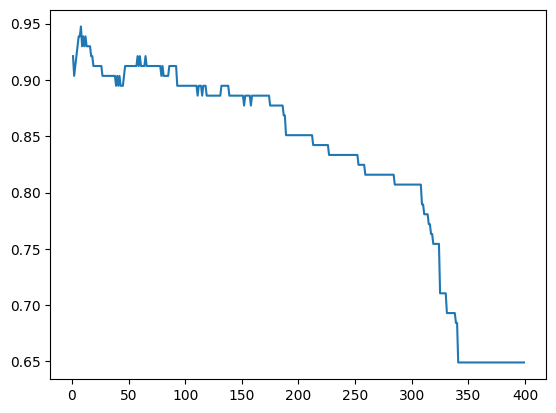

In [183]:
import matplotlib.pyplot as plt #시각화 라이브러리다

k_list = range(1,400) #range 타입이다. 그래프의 x좌표를 책임질 것이다
acc = [] #정확도를 저장할 list다
for i in k_list: #range만큼 for문을 돌린다
    classifier = KNeighborsClassifier(n_neighbors=i) # i만큼 클러스터 갯수를 설정한다
    classifier.fit(x_train, y_train)
    acc.append(classifier.score(x_test, y_test))
plt.plot(k_list, acc) #x좌표는 k_list y좌표는 acc다
plt.xlabel = '클러스터 갯수'
plt.ylabel = '정확도'
plt.title = 'KNN 알고리즘'
print(acc)

plt.show() #그래프 출력

In [184]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


기존의 학습 방법은 정규화를 진행하지 않았다. 하지만 max값이 2501 min 값은 0.014 등으로 max-min 값이 매우 큰 차이가 나기 때문에 크기에 따라 학습의 영향력이 달라지게 된다. 따라서 정규화를 하면 더 나은 정확도를 얻을 수 있다

In [185]:
def min_max_normalization(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalization(df_data[x])
    
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [192]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

[0.9473684210526315, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.9649122807017544, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877

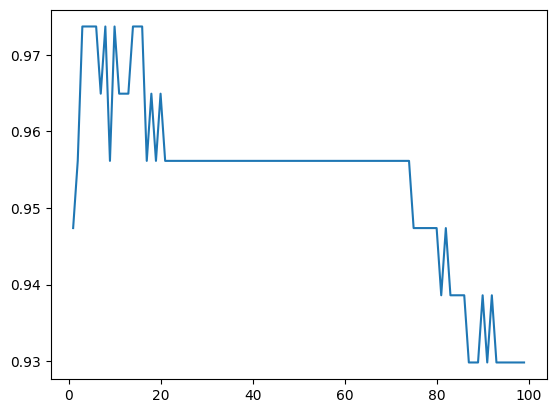

In [196]:
from sklearn.model_selection import train_test_split # 사이킷런의 모델 학습, 테스트 데이터 분류 함수다
import matplotlib.pyplot as plt #시각화 라이브러리다

x_train2, x_test2, y_train2, y_test2 = train_test_split(df_data.values, df_labels.values.flatten()
, test_size=0.2, random_state= 7) # 트레인 데이터 X, 라벨 데이터 Y, TEST_SIZE 분류 크기, 랜덤스테이트는 값 섞기( 숫자는 큰 의미는 없다. 매번 같은 결과가 나올 수 있도록 '7'이란 이름의 섞기를 진행한다고 보면 된다)
# df_labels.values가 2차원 배열로 나와서 flatten() 함수를 사용했다. falttern은 2차원 배열을 1차원 배열로 변환해준다


k_list = range(1,100) #range 타입이다. 그래프의 x좌표를 책임질 것이다
acc2 = [] #정확도를 저장할 list다
for i in k_list: #range만큼 for문을 돌린다
    classifier = KNeighborsClassifier(n_neighbors=i) # i만큼 클러스터 갯수를 설정한다
    classifier.fit(x_train2, y_train2)
    acc2.append(classifier.score(x_test2, y_test2))
plt.plot(k_list, acc2) #x좌표는 k_list y좌표는 acc다
plt.xlabel = '클러스터 갯수'
plt.ylabel = '정확도'
plt.title = 'KNN 알고리즘'
print(acc2)

plt.show() #그래프 출력

정규화를 진행할 시 더 나은 정확도를 얻을 수 있다